# Ternary Search Tree Project

## Anahita Hosseinkhani (2262542), Oviya Arockia raj (2262353), Elisa Verhofstadt (2261793)

A ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure should support the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure

Also ensure that an instance of the data structure can be visualy represented, e.g., in aSCII format.

# Implementation

In [1]:
%load_ext autoreload
%autoreload 2

The data structure has been implemented as a class.

In [48]:
from new_TNT import TernarySearchTree

# Example usage

Create a new empty ternery search tree.

In [3]:
tst = TernarySearchTree()

Insert the string `'abc'` into the tree.

In [4]:
tst.insert('abc')

Display the tree.

In [5]:
print(tst)

└─char: a, terminates: False
    └─char: b, terminates: False
        └─char: c, terminates: True



Insert another string `'aqt'`.

In [6]:
tst.insert('aqt')

In [7]:
print(tst)

└─char: a, terminates: False
    └─char: b, terminates: False
        └─char: c, terminates: True
        └─char: q, terminates: False
            └─char: t, terminates: True



The tree should now contain two strings.

In [8]:
len(tst)

2

In [9]:
tst.all_strings()

['abc', 'aqt']

Search for the string `'ab'`, it should be found since it is a prefix of `'abc'`.

In [10]:
tst.search('ab')

True

The string `'ac'` should not be found.

In [11]:
tst.search('ac')

False

The tree can also contain the empty string.

In [12]:
tst.insert('')

In [13]:
len(tst)

3

In [14]:
print(tst)

└─char: a, terminates: False
    └─char: b, terminates: False
        └─char: c, terminates: True
        └─char: q, terminates: False
            └─char: t, terminates: True



In [15]:
tst.all_strings()

['abc', 'aqt', '']

# Testing

The file `insert_words.txt` contains words that we can insert into a tree.

In [49]:
tst = TernarySearchTree()
with open('insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)


Verify the length of the data stucture.

In [50]:
assert len(tst) == len(unique_words), \
       f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [51]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [52]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

Check that when searching for a exact match, only the inserted words are found, and no prefixes.

In [53]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), \
                   f'{prefix} found'

Check that the empty string is in the tree (since it is a prefix of any string).

In [54]:
assert tst.search(''), 'empty string not found'

Check that the empty string is not in the tree for an exact search.

In [58]:
assert not tst.search('', exact=True), 'empty string found'

AssertionError: empty string found

Check that words in the file `data/search_trees/not_insert_words.txt` can not be found in the tree.

In [56]:
with open('not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [57]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

If not output was generated, all tests have passed.

### Complexity and benchmark scaling

#### Theoretical expectations complexity

**Search (exact)**:
In the average case, which is defined as a well-balanced ternary search tree with randomly distributed words, the search tree exhibits a logarithmic complexity of **O(log n)**, with n being the nodes included in the search tree. The logarithmic complexity arises from the fact that each step where a recursive function on left, right or middle node is called reduces the available range of nodes that can belong to a word by a constant of 3 (in a perfectly balanced ternary tree). This means that the number of steps needed to find a word is the logarithm of the total amount of nodes stored in the search tree.

Considering the worst-case scenario, where the words are inserted in sorted order leading to an unbalanced tree, time complexity of the function increases to **O(n)**, representing linear search. The lack of balance in the tree causes the search process to traverse the tree linearly, visiting each node in a sequential manner until the desired word is found, resulting in an inefficient search.

In the case of search for a word that does not exist, time complexity still remains **O(log n)**. This is because the search process follows the same path which narrows down the search range logarithmically, even if a word is not found.

**Search (prefix)**: 
The time complexity of search for a prefix is similar to the time complexity of search for an exact word, being **O(log n)**. This is the case because to get to appropriate position you still need to perform the same amount of comparisions as is done in the exact search.
Similarly, the time complexity for sorted words in the search tree is **O(n)** and search for a prefix that does not exist is **O(log n)**.

**Insert**:
The time complexity for insertion of a word is in the average case (i.e., well-balanced ternary search tree with randomly distributed words) is **O(log n)**, with n being the nodes already included in the search tree. This complexity arises from the process in which the appropriate position is found for the new word. At each step, a comparison is made between the current node and the string input. From this comparison the original space that needs to be inspected and where the string can be inserted is reduced by a factor, allowing for efficient insertion.

However, the worst-case scenario is for a highly unbalanced tree where the words in the tree are in sorted order and the word currently is next in this specific order. This case results in an increase in time complexity to **O(n)**, because all possible comparisons need to be made before the word can be inserted. In a best-case scenario the word that needs to be inserted is in reverse order compared to order the words already present in the tree. For such specific words the time complexity is **O(1)**.

**All strings**:
The time complexity of the functionality that returns all string from a ternary search tree is **O(n)** with n the numbers of nodes in the tree. Visiting a node enables the identification of the presence of a word. By using depth-first search the function ensures that each node is visited only once. Therefore, the time it takes to retrieve all words grows linearly with the amount of words (and their length) that are inserted in the tree structure. No best or worst cases can be identified for this function.

#### Scaling behaviour

In [78]:
import random
import time
import matplotlib.pyplot as plt

with open('corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

samples = [
    random.sample(words, k=size) for size in sizes
]

Search (exact):

In [85]:
nr_runs = 1_000
times = {}
# search 20 words in tree structure
search_sample = random.sample(words, k=20)
for sample in samples:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word, exact='True')
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.1755688,
 500: 0.2400627,
 1000: 0.2698241,
 5000: 0.9208908,
 10000: 0.3745856,
 20000: 0.3243925,
 30000: 0.3653444,
 40000: 0.6459831,
 50000: 0.3759372}

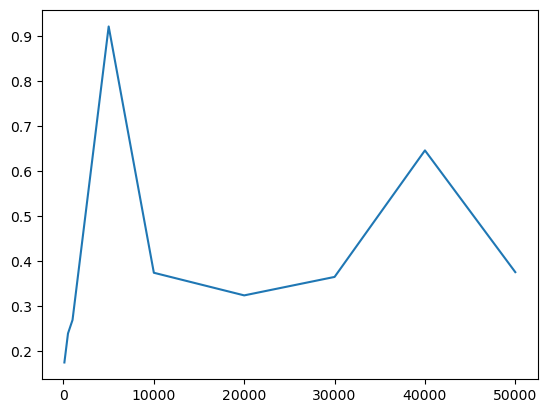

In [86]:
plt.plot(times.keys(), times.values());

Search (prefix):

In [89]:
nr_runs = 1_000
times = {}
search_sample = random.sample(words, k=20)
# create 20 prefixes
search_prefix_sample = [sample_word[:-2] for sample_word in search_sample]
for sample in samples:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_prefix_sample:
            tst.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.1017759,
 500: 0.128656,
 1000: 0.1660934,
 5000: 0.2294204,
 10000: 0.2531817,
 20000: 0.2894251,
 30000: 0.229665,
 40000: 0.2299706,
 50000: 0.1850307}

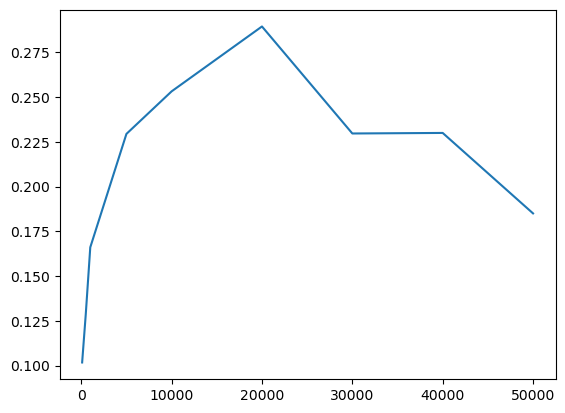

In [90]:
plt.plot(times.keys(), times.values());